# Figure S5

In [1]:
import os
import anndata
from pysankey import sankey # install via: pip install pysankeybeta
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'
dpi = 300


def plot_overlap_heatmap(df, col_y, col_x, y_order=None, x_order=None, cmap="Blues", figsize=(6, 6),
                         invert_y=True, invert_x=True):
    # contingency table
    ct = pd.crosstab(df[col_y], df[col_x])

    # apply explicit orders or frequency sort
    if y_order is not None:
        y_idx = [i for i in y_order if i in ct.index]
    else:
        y_idx = ct.sum(axis=1).sort_values(ascending=False).index.tolist()
    if invert_y:
        y_idx = y_idx[::-1]
    ct = ct.reindex(index=y_idx)

    if x_order is not None:
        x_idx = [i for i in x_order if i in ct.columns]
    else:
        x_idx = ct.sum(axis=0).sort_values(ascending=False).index.tolist()
    if invert_x:
        x_idx = x_idx[::-1]
    ct = ct.reindex(columns=x_idx)

    # row-normalize to percentages
    data = ct.div(ct.sum(axis=1), axis=0).fillna(0) * 100

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(data.values, aspect='equal', cmap=cmap, vmin=0, vmax=100)

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(data.columns, rotation=90)
    ax.set_yticklabels(data.index,)
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)

    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('% of source celltype')

    fig.tight_layout()
    return fig, ax

In [2]:
path_full_h5ad = "../figure_data/input_data_Xenium/xenium_ovarian_cancer_full.h5ad"
output_folder = "../manuscript_figures/Figure_S5/"

os.makedirs(output_folder, exist_ok = True)

In [3]:
adata = anndata.read_h5ad(path_full_h5ad)

In [4]:
no_tumor_adata = adata[~adata.obs["is_tumor_cell_type"]]
no_tumor_adata_test = no_tumor_adata[no_tumor_adata.obs.is_in_vitmae_test_set]
no_tumor_adata_test = no_tumor_adata_test[~no_tumor_adata_test.obs["10X_cell_type"].isna(), :]

columns = ["10X_cell_type", 'SCimilarity_transcriptome_cell_type', 'SCimilarity_image_cell_type']
df = no_tumor_adata_test.obs.get(columns)

In [5]:
cell_order_10x = [
    'T and NK Cells',
    'Stromal Associated Fibroblasts',
    'Stromal Associated Endothelial Cells',
    'Fallopian Tube Epithelium',
    'Ciliated Epithelial Cells',
    'Unassigned',
    'Macrophages',
    'Pericytes',
    'Granulosa Cells',
    'Smooth Muscle Cells',
 
]

cell_order_transcriptome = [
    'leukocyte',
    'stromal cell of ovary',
    'fibroblast', 
    'endothelial cell',
    'epithelial cell',
    'mast cell',
    'macrophage',
    'dendritic cell',
    'myofibroblast cell',
    'monocyte',
    'smooth muscle cell',
]

cell_order_image = [x for x in cell_order_transcriptome if x not in ['stromal cell of ovary', 'mast cell']]

cell_order_10x.reverse()
cell_order_transcriptome.reverse()
cell_order_image.reverse()

## Fig S5a: quantify degree of overlap 10X cell type labels and SCimilarity transcriptome cell type labels

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


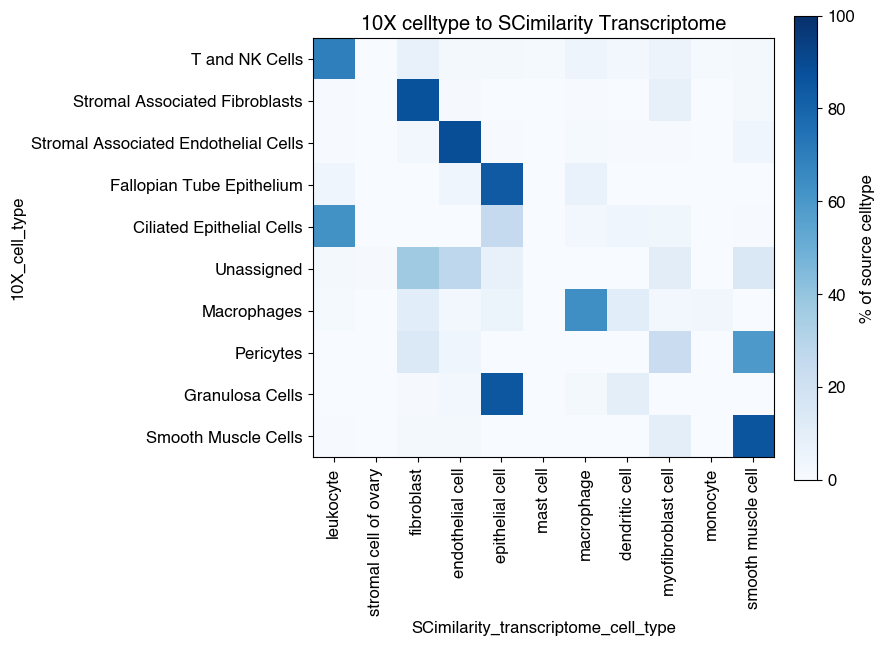

In [6]:
fig, ax = plot_overlap_heatmap(
    df,
    col_y='10X_cell_type',
    col_x='SCimilarity_transcriptome_cell_type',
    y_order=cell_order_10x,
    x_order=cell_order_transcriptome,
    figsize=(9, 7)
)
ax.set_title('10X celltype to SCimilarity Transcriptome')
fig.tight_layout()
fig.savefig(f"{output_folder}/heatmap_celltype_transitions_10X_to_SCimilarity_transcriptome.pdf", dpi = 300)


## Fig S5b: quantify degree of overlap SCimilarity transcriptome cell type labels and SCimilarity image cell type labels

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


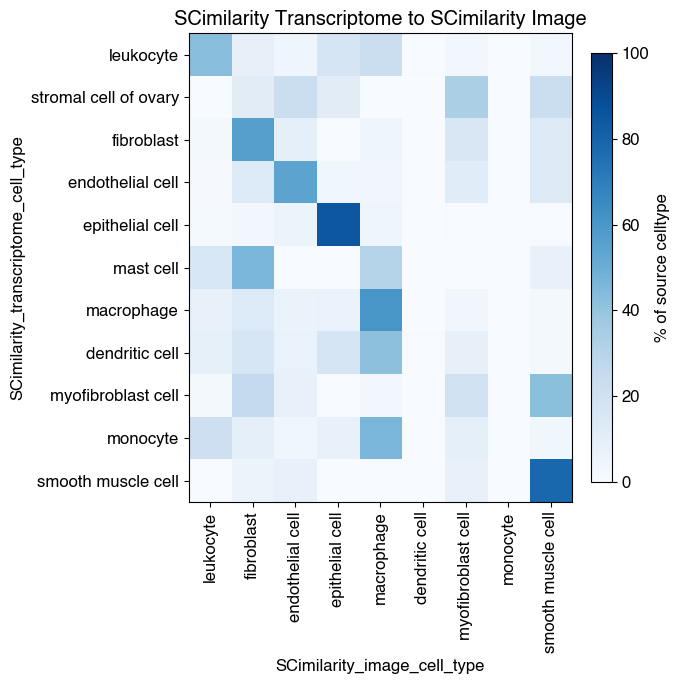

In [7]:
fig, ax = plot_overlap_heatmap(
    df,
    col_y='SCimilarity_transcriptome_cell_type',
    col_x='SCimilarity_image_cell_type',
    y_order = cell_order_transcriptome,
    x_order = cell_order_image,
    figsize=(7, 7)
)
ax.set_title('SCimilarity Transcriptome to SCimilarity Image')
fig.tight_layout()
fig.savefig(f"{output_folder}/heatmap_celltype_transitions_SCimilarity_transcriptome_to_SCimilarity_image.pdf", dpi = 300)
